In [161]:
from scipy.stats import binom
import pandas as pd
import matplotlib.pyplot as plt

In [162]:
def probWinX(currentWins, currentLosses, desiredWins,trueWinningPercentage):
    necWins = desiredWins-currentWins - 1
    gamesLeft = 162 - currentWins - currentLosses
    probability = binom.cdf(necWins,gamesLeft,trueWinningPercentage)
    return 1-probability

print("Probability of winning 117: " + str(probWinX(9,2,117,105/162)))
print("Probability of winning 116: " + str(probWinX(9,2,116,105/162)))

Probability of winning 117: 0.04869741459613086
Probability of winning 116: 0.06918910372420517


In [163]:
def generateGraph(currentWins, currentLosses):
    list1 = []
    list2 = []

    for i in range(500, 720, 2):

        list1.append(i/1000)
        list2.append(probWinX(currentWins,currentLosses,117,i/1000))

    list1.append(105/162)
    list2.append(probWinX(currentWins,currentLosses,117,105/162))

    plt.scatter(list1, list2, c= "#005a96", s = 75)
    plt.scatter(list1[len(list1)-1], list2[len(list2)-1], color="#ef3e42", s = 75)
    plt.xlabel('True Winning Percentage')
    plt.ylabel("Probability of winning 117+ games")
    plt.suptitle("Probability of Dodgers breaking win record")
    plt.title("Dodgers currently: " + str(currentWins) + "-" + str(currentLosses))
    plt.annotate('If the Dodgers are a true-talent 105 win team, \n they have a ' + str(list2[len(list2)-1])[2:4] + "." + 
                 str(list2[len(list2)-1])[4:5] +
                 "% chance of winning 117+",
                 xy =(list1[len(list1)-1], list2[len(list2)-1]),
                    xytext =(.57, .1), 
                    arrowprops = dict(facecolor ='#ef3e42',
                                      shrink = 0.05),)
    plt.rcParams["figure.figsize"] = (14,10)
    text = "dodgers" + str(currentWins) + "-" + str(currentLosses)
    plt.savefig("./"+text+".jpg")
    plt.show()

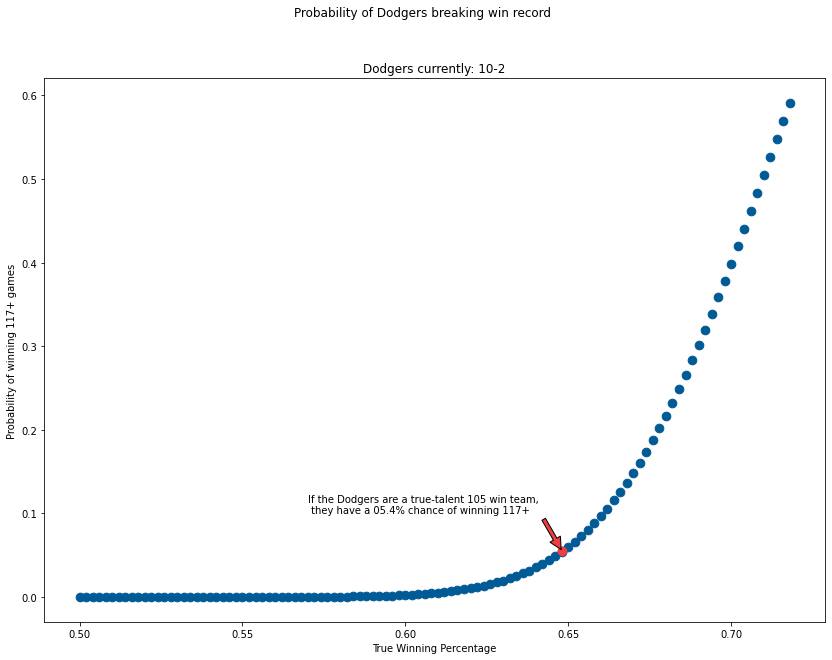

In [164]:
generateGraph(10, 2)